In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from glob import glob

In [3]:
csv_files = glob("zippedData/*.csv.gz")

In [4]:
csv_files

['zippedData/imdb.title.crew.csv.gz',
 'zippedData/tmdb.movies.csv.gz',
 'zippedData/imdb.title.akas.csv.gz',
 'zippedData/imdb.title.ratings.csv.gz',
 'zippedData/imdb.name.basics.csv.gz',
 'zippedData/imdb.title.basics.csv.gz',
 'zippedData/tn.movie_budgets.csv.gz',
 'zippedData/bom.movie_gross.csv.gz',
 'zippedData/imdb.title.principals.csv.gz']

In [5]:
import os

In [6]:
csv_files_dict = {}
for filename in csv_files:
    filename_cleaned = os.path.basename(filename).replace(".csv", "").replace(".", "_")
    filename_df = pd.read_csv(filename, index_col = 0)
    csv_files_dict[filename_cleaned] = filename_df

In [7]:
csv_files_dict.keys()

dict_keys(['imdb_title_crew_gz', 'tmdb_movies_gz', 'imdb_title_akas_gz', 'imdb_title_ratings_gz', 'imdb_name_basics_gz', 'imdb_title_basics_gz', 'tn_movie_budgets_gz', 'bom_movie_gross_gz', 'imdb_title_principals_gz'])

In [8]:
csv_files_dict['imdb_title_crew_gz'].head()

,directors,writers
tconst,,
tt0285252,nm0899854,nm0899854
tt0438973,NaN,"nm0175726,nm1802864"
tt0462036,nm1940585,nm1940585
tt0835418,nm0151540,"nm0310087,nm0841532"
tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


In [9]:
def read_file(path):
    df = pd.read_csv(path)
    return df

### Most profitable films

In [10]:
movie_budgets_df = csv_files_dict['tn_movie_budgets_gz']

In [11]:
movie_budgets_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [12]:
movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null object
domestic_gross       5782 non-null object
worldwide_gross      5782 non-null object
dtypes: object(5)
memory usage: 271.0+ KB


In [13]:
def convert_col_to_int(df, col):
    df[col] = df[col].str.replace("$", "").str.replace(",", "").astype('int')
    return df

In [14]:
cols_to_convert = ['production_budget', 'domestic_gross', 'worldwide_gross']

for col in cols_to_convert:
    movie_budgets_df = convert_col_to_int(movie_budgets_df, col)

In [15]:
movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null int64
domestic_gross       5782 non-null int64
worldwide_gross      5782 non-null int64
dtypes: int64(3), object(2)
memory usage: 271.0+ KB


In [16]:
movie_budgets_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [17]:
movie_budgets_df.isna().sum()

release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [18]:
for col in movie_budgets_df:
    print(f"Currently checking values from col: {col}")
    print(f"Top 5 values:\n{movie_budgets_df[col].value_counts(normalize = True)[:5]}")
    print("------------------------------")

Currently checking values from col: release_date
Top 5 values:
Dec 31, 2014    0.004151
Dec 31, 2015    0.003978
Dec 31, 2010    0.002594
Dec 31, 2008    0.002421
Dec 31, 2009    0.002248
Name: release_date, dtype: float64
------------------------------
Currently checking values from col: movie
Top 5 values:
Halloween                        0.000519
Home                             0.000519
King Kong                        0.000519
The Day the Earth Stood Still    0.000346
Footloose                        0.000346
Name: movie, dtype: float64
------------------------------
Currently checking values from col: production_budget
Top 5 values:
20000000    0.039952
10000000    0.036666
30000000    0.030612
15000000    0.029920
25000000    0.029575
Name: production_budget, dtype: float64
------------------------------
Currently checking values from col: domestic_gross
Top 5 values:
0           0.094777
8000000     0.001557
2000000     0.001211
7000000     0.001211
10000000    0.001038
Name: d

Now that we have checked the most occurring values and we have checked the datatypes as well. we can move on to the actual question. First we will need a new column which shows the profit or loss. 

In [19]:
movie_budgets_df['difference'] = movie_budgets_df['worldwide_gross'] - movie_budgets_df['production_budget']
movie_budgets_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,difference
id,,,,,,
1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875
3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650
4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747


In [20]:
sorted_movies = movie_budgets_df.sort_values(by = 'difference', ascending=False).head()

In [21]:
sorted_movies

,release_date,movie,production_budget,domestic_gross,worldwide_gross,difference
id,,,,,,
1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279
43,"Dec 19, 1997",Titanic,200000000,659363944,2208208395,2008208395
7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200
6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220
34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,1433854864


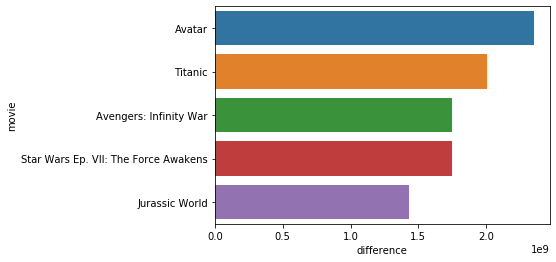

In [22]:
sns.barplot(x = 'difference', y = 'movie', data = sorted_movies)

#### lets investigate these movies a bit more and see what makes them so profitable

In [23]:
imdb_title_basics_df = csv_files_dict['imdb_title_basics_gz']

In [24]:
imdb_title_basics_df.head()

,primary_title,original_title,start_year,runtime_minutes,genres
tconst,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [25]:
imdb_title_basics_df.shape

(146144, 5)

In [26]:
movie_details_df = pd.merge(movie_budgets_df, imdb_title_basics_df, left_on = ['movie'],
                        right_on = ['primary_title'],
                        how = 'left')

In [27]:
movie_details_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,difference,primary_title,original_title,start_year,runtime_minutes,genres
0,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,Avatar,Abatâ,2011.0,93.0,Horror
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"Action,Adventure,Fantasy"
2,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,Dark Phoenix,Dark Phoenix,2019.0,113.0,"Action,Adventure,Sci-Fi"
3,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,Avengers: Age of Ultron,Avengers: Age of Ultron,2015.0,141.0,"Action,Adventure,Sci-Fi"
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,NaN,NaN,NaN,NaN,NaN


In [28]:
movie_details_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7221 entries, 0 to 7220
Data columns (total 11 columns):
release_date         7221 non-null object
movie                7221 non-null object
production_budget    7221 non-null int64
domestic_gross       7221 non-null int64
worldwide_gross      7221 non-null int64
difference           7221 non-null int64
primary_title        3815 non-null object
original_title       3814 non-null object
start_year           3815 non-null float64
runtime_minutes      3328 non-null float64
genres               3743 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 677.0+ KB


In [29]:
movie_details_df.isna().sum() / len(movie_details_df)

release_date         0.000000
movie                0.000000
production_budget    0.000000
domestic_gross       0.000000
worldwide_gross      0.000000
difference           0.000000
primary_title        0.471680
original_title       0.471818
start_year           0.471680
runtime_minutes      0.539122
genres               0.481651
dtype: float64

In [30]:
movie_details_df.dropna(inplace=True)

In [31]:
movie_details_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3309 entries, 0 to 7219
Data columns (total 11 columns):
release_date         3309 non-null object
movie                3309 non-null object
production_budget    3309 non-null int64
domestic_gross       3309 non-null int64
worldwide_gross      3309 non-null int64
difference           3309 non-null int64
primary_title        3309 non-null object
original_title       3309 non-null object
start_year           3309 non-null float64
runtime_minutes      3309 non-null float64
genres               3309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 310.2+ KB


In [32]:
movie_details_df.isna().sum()

release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
difference           0
primary_title        0
original_title       0
start_year           0
runtime_minutes      0
genres               0
dtype: int64

In [33]:
movie_details_df.genres

0                         Horror
1       Action,Adventure,Fantasy
2        Action,Adventure,Sci-Fi
3        Action,Adventure,Sci-Fi
6        Action,Adventure,Sci-Fi
                  ...           
7204         Comedy,Drama,Horror
7205                       Drama
7211                Comedy,Drama
7216      Horror,Sci-Fi,Thriller
7219       Drama,Horror,Thriller
Name: genres, Length: 3309, dtype: object

In [34]:
movie_details_df['genres_split'] = movie_details_df['genres'].map(lambda x: x.split(",") if x else x)
movie_details_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,difference,primary_title,original_title,start_year,runtime_minutes,genres,genres_split
0,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,Avatar,Abatâ,2011.0,93.0,Horror,[Horror]
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"Action,Adventure,Fantasy","[Action, Adventure, Fantasy]"
2,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,Dark Phoenix,Dark Phoenix,2019.0,113.0,"Action,Adventure,Sci-Fi","[Action, Adventure, Sci-Fi]"
3,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,Avengers: Age of Ultron,Avengers: Age of Ultron,2015.0,141.0,"Action,Adventure,Sci-Fi","[Action, Adventure, Sci-Fi]"
6,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,Avengers: Infinity War,Avengers: Infinity War,2018.0,149.0,"Action,Adventure,Sci-Fi","[Action, Adventure, Sci-Fi]"


In [35]:
movie_details_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3309 entries, 0 to 7219
Data columns (total 12 columns):
release_date         3309 non-null object
movie                3309 non-null object
production_budget    3309 non-null int64
domestic_gross       3309 non-null int64
worldwide_gross      3309 non-null int64
difference           3309 non-null int64
primary_title        3309 non-null object
original_title       3309 non-null object
start_year           3309 non-null float64
runtime_minutes      3309 non-null float64
genres               3309 non-null object
genres_split         3309 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 336.1+ KB


In [36]:
all_genres = set()
for genre in movie_details_df['genres_split']:
    if genre:
        all_genres.update(genre)

In [37]:
all_genres

{'Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'War',
 'Western'}

In [38]:
type(movie_details_df['genres_split'][0])

list

In [39]:
movie_details_df['genre1'] = movie_details_df['genres_split'].map(lambda x: x[0])

In [40]:
movie_details_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,difference,primary_title,original_title,start_year,runtime_minutes,genres,genres_split,genre1
0,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,Avatar,Abatâ,2011.0,93.0,Horror,[Horror],Horror
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"Action,Adventure,Fantasy","[Action, Adventure, Fantasy]",Action
2,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,Dark Phoenix,Dark Phoenix,2019.0,113.0,"Action,Adventure,Sci-Fi","[Action, Adventure, Sci-Fi]",Action
3,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,Avengers: Age of Ultron,Avengers: Age of Ultron,2015.0,141.0,"Action,Adventure,Sci-Fi","[Action, Adventure, Sci-Fi]",Action
6,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,Avengers: Infinity War,Avengers: Infinity War,2018.0,149.0,"Action,Adventure,Sci-Fi","[Action, Adventure, Sci-Fi]",Action


In [41]:
y  = "NA"

In [42]:
movie_details_df['genre2'] = movie_details_df['genres_split'].map(lambda x: y if len(x) < 2 else x[1])

In [43]:
movie_details_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,difference,primary_title,original_title,start_year,runtime_minutes,genres,genres_split,genre1,genre2
0,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,Avatar,Abatâ,2011.0,93.0,Horror,[Horror],Horror,NA
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"Action,Adventure,Fantasy","[Action, Adventure, Fantasy]",Action,Adventure
2,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,Dark Phoenix,Dark Phoenix,2019.0,113.0,"Action,Adventure,Sci-Fi","[Action, Adventure, Sci-Fi]",Action,Adventure
3,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,Avengers: Age of Ultron,Avengers: Age of Ultron,2015.0,141.0,"Action,Adventure,Sci-Fi","[Action, Adventure, Sci-Fi]",Action,Adventure
6,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,Avengers: Infinity War,Avengers: Infinity War,2018.0,149.0,"Action,Adventure,Sci-Fi","[Action, Adventure, Sci-Fi]",Action,Adventure


In [44]:
movie_details_df.drop(columns=['genres', 'genres_split'], inplace = True)

In [45]:
movie_details_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3309 entries, 0 to 7219
Data columns (total 12 columns):
release_date         3309 non-null object
movie                3309 non-null object
production_budget    3309 non-null int64
domestic_gross       3309 non-null int64
worldwide_gross      3309 non-null int64
difference           3309 non-null int64
primary_title        3309 non-null object
original_title       3309 non-null object
start_year           3309 non-null float64
runtime_minutes      3309 non-null float64
genre1               3309 non-null object
genre2               3309 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 496.1+ KB


In [46]:
movie_details_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,difference,primary_title,original_title,start_year,runtime_minutes,genre1,genre2
0,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,Avatar,Abatâ,2011.0,93.0,Horror,NA
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,Action,Adventure
2,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,Dark Phoenix,Dark Phoenix,2019.0,113.0,Action,Adventure
3,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,Avengers: Age of Ultron,Avengers: Age of Ultron,2015.0,141.0,Action,Adventure
6,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,Avengers: Infinity War,Avengers: Infinity War,2018.0,149.0,Action,Adventure


In [47]:
movie_details_df.drop(columns=['primary_title', 'original_title', 'start_year'], inplace=True)

In [48]:
movie_details_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3309 entries, 0 to 7219
Data columns (total 9 columns):
release_date         3309 non-null object
movie                3309 non-null object
production_budget    3309 non-null int64
domestic_gross       3309 non-null int64
worldwide_gross      3309 non-null int64
difference           3309 non-null int64
runtime_minutes      3309 non-null float64
genre1               3309 non-null object
genre2               3309 non-null object
dtypes: float64(1), int64(4), object(4)
memory usage: 418.5+ KB


In [49]:
movie_details_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,difference,runtime_minutes,genre1,genre2
0,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,93.0,Horror,NA
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,136.0,Action,Adventure
2,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,113.0,Action,Adventure
3,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,141.0,Action,Adventure
6,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,149.0,Action,Adventure


In [50]:
movie_details_df.isna().sum()

release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
difference           0
runtime_minutes      0
genre1               0
genre2               0
dtype: int64

In [51]:
for col in movie_details_df:
    print(f"Currently checking values from col: {col}")
    print(f"Top 5 values:\n{movie_details_df[col].value_counts(normalize = True)[:5]}")
    print("------------------------------")

Currently checking values from col: release_date
Top 5 values:
Mar 27, 2015    0.007555
Jun 5, 2009     0.006649
Apr 23, 2009    0.006649
Feb 6, 2004     0.005742
Dec 31, 2012    0.005440
Name: release_date, dtype: float64
------------------------------
Currently checking values from col: movie
Top 5 values:
Home          0.019946
Brothers      0.005440
The Gift      0.005440
The Return    0.004533
The Island    0.004231
Name: movie, dtype: float64
------------------------------
Currently checking values from col: production_budget
Top 5 values:
10000000    0.036869
20000000    0.036567
5000000     0.032336
25000000    0.032034
15000000    0.031732
Name: production_budget, dtype: float64
------------------------------
Currently checking values from col: domestic_gross
Top 5 values:
0            0.137806
177397510    0.006649
15433        0.006649
501752       0.004533
656688       0.002720
Name: domestic_gross, dtype: float64
------------------------------
Currently checking values fro

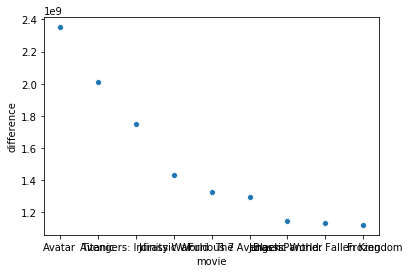

In [52]:
sns.scatterplot(x = 'movie', y = 'difference', data = movie_details_df.sort_values(by = 'difference', ascending = False)[:10])

In [53]:
movies_by_genre = movie_details_df.groupby(by = ['genre1']).sum()

In [54]:
movies_by_genre.reset_index(inplace=True).head()

AttributeError: 'NoneType' object has no attribute 'head'

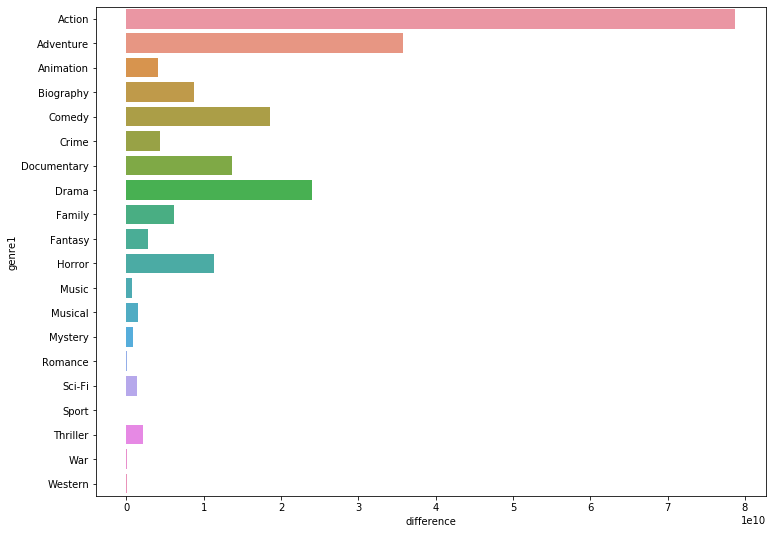

In [56]:
plt.figure(figsize = (12,9))
sns.barplot(x = 'difference', y = 'genre1', data = movies_by_genre)

In [58]:
movies_by_genre.to_csv('genre_movies.csv')